In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',version=1,cache=True)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:

print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
features = mnist['data']

In [6]:
len(mnist['feature_names'])

784

In [7]:
target = mnist['target']

In [8]:
target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
def show_img(img, label):
    plt.imshow(img, cmap='binary')
    plt.title(label)
    plt.axis('off')
    plt.show()

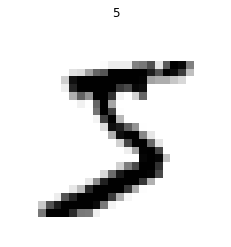

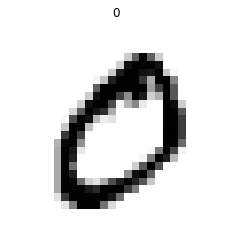

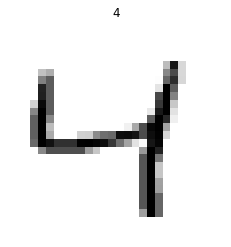

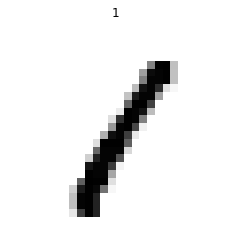

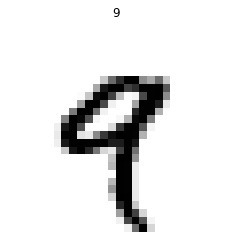

In [11]:
c = 1
for lb, img in zip(target, features.values):
    img = img.reshape(28, 28)
    show_img(img, lb)
    if c == 5:
        break
    c += 1

In [12]:
features.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
target.unique()

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [14]:
target.value_counts() / len(target)

1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
Name: class, dtype: float64

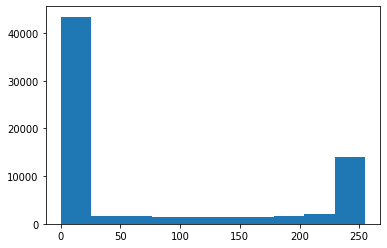

In [15]:
plt.hist(features.iloc[:, 400])
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

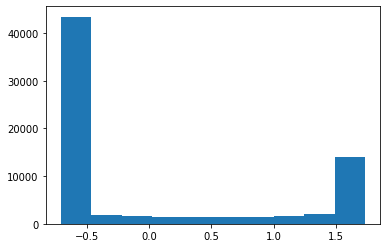

In [17]:
plt.hist(StandardScaler().fit_transform(features)[:, 400])
plt.show()

In [18]:
X = features
y = target.astype('int')

In [19]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int32

In [21]:
X_tr = StandardScaler().fit_transform(X)

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
(tr_idx, ts_idx), = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2).split(X_tr, y)

In [24]:
X_train, X_test, y_train, y_test = X_tr[tr_idx], X_tr[ts_idx], y[tr_idx], y[ts_idx]

In [25]:

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

In [36]:
ensemble = RandomForestClassifier(n_jobs=-1)
k_neig = KNeighborsClassifier(n_jobs=-1)

In [40]:
ensemble.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [41]:
k_neig.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [42]:

ensemble_pred = ensemble.predict(X_train)
k_pred = k_neig.predict(X_train)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:

print("Random Forest")
print(accuracy_score(y_train,ensemble_pred))
print(confusion_matrix(y_train, ensemble_pred))
print("k neighour")
print(accuracy_score(y_train,k_pred))
print(confusion_matrix(y_train, k_pred))

Random Forest
1.0
[[5522    0    0    0    0    0    0    0    0    0]
 [   0 6302    0    0    0    0    0    0    0    0]
 [   0    0 5592    0    0    0    0    0    0    0]
 [   0    0    0 5713    0    0    0    0    0    0]
 [   0    0    0    0 5459    0    0    0    0    0]
 [   0    0    0    0    0 5051    0    0    0    0]
 [   0    0    0    0    0    0 5501    0    0    0]
 [   0    0    0    0    0    0    0 5834    0    0]
 [   0    0    0    0    0    0    0    0 5460    0]
 [   0    0    0    0    0    0    0    0    0 5566]]
k neighour
0.9628928571428571
[[5453    3    8    6    1   16   31    1    1    2]
 [   1 6259   16    2    2    1   12    6    1    2]
 [  30   36 5365   49   15    6   28   35   20    8]
 [   4   14   37 5521    3   48    3   40   24   19]
 [   2   47   38    5 5209   11   14    9    6  118]
 [  20    4   13  100   12 4807   50   10   12   23]
 [  38   11   16    2    9   35 5385    1    4    0]
 [   7   56   23   13   39    5    0 5587    4  10

In [46]:

ensemble_pred = ensemble.predict(X_test)
k_pred = k_neig.predict(X_test)

In [47]:

print("Random Forest")
print(accuracy_score(y_test,ensemble_pred))
print(confusion_matrix(y_test, ensemble_pred))
print("k neighour")
print(accuracy_score(y_test,k_pred))
print(confusion_matrix(y_test, k_pred))

Random Forest
0.9673571428571428
[[1367    1    1    0    1    0    4    0    6    1]
 [   0 1551    7    5    1    2    2    5    1    1]
 [  11    3 1347    4    4    0    6   11   12    0]
 [   1    0   15 1369    0   17    1   14    8    3]
 [   3    3    2    0 1316    0    6    0    2   33]
 [   4    2    2   16    2 1205   15    2    9    5]
 [   9    3    1    0    3    5 1352    0    2    0]
 [   2    6   14    0    7    0    0 1414    2   14]
 [   1    4    4   10    4   13    6    2 1306   15]
 [   7    7    2   15   18    5    1    9   12 1316]]
k neighour
0.945
[[1371    1    1    1    0    2    4    0    0    1]
 [   0 1559    5    2    2    0    4    3    0    0]
 [  18   15 1308   16    5    2   16   12    5    1]
 [   5    5   13 1362    1   12    2   16    9    3]
 [   2   17   12    5 1260    2    7    9    2   49]
 [   9    6    1   33    2 1160   25    5    9   12]
 [  11    3    1    1    4   12 1342    0    1    0]
 [   4   11    8    3   12    0    0 1368    0  